# Importing libraries

In [474]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math

In [475]:
#reading data
data=pd.read_excel("ANZ synthesised transaction dataset.xlsx")

In [476]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [477]:
new_data=data[data.txn_description=="PAY/SALARY"]

In [338]:
new_data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,...,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,...,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,...,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,...,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,...,43,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit


In [339]:
new_data.drop(['status', 'bpay_biller_code', 'account','currency', 'long_lat', 'txn_description', 'merchant_id','merchant_code', 'first_name','merchant_suburb', 'merchant_state', 'extraction','transaction_id', 'country', 'merchant_long_lat'],inplace=True,axis=1)

C:\Users\aayus\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [340]:
new_data.head()
df=new_data

In [341]:
new_data.isna().sum()

card_present_flag    883
balance                0
date                   0
gender                 0
age                    0
amount                 0
customer_id            0
movement               0
dtype: int64

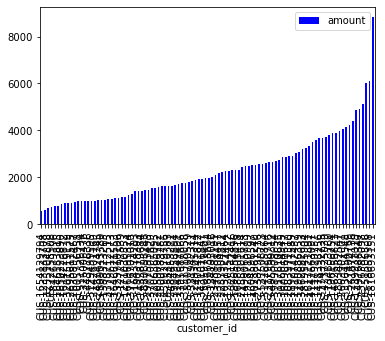

In [342]:
new_data[['customer_id','amount']].groupby(["customer_id"]).mean().sort_values(by='amount').plot.bar(color='blue')
plt.show()

In [343]:
new_data.dtypes

card_present_flag           float64
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
amount                      float64
customer_id                  object
movement                     object
dtype: object

In [344]:
new_data=new_data.groupby("customer_id").mean().sort_values(by="amount")
new_data.head()

,card_present_flag,balance,age,amount
customer_id,,,,
CUS-1654129794,NaN,2807.029231,64,576.00
CUS-1233833708,NaN,5265.287500,44,596.33
CUS-3255104878,NaN,31522.593846,43,664.43
CUS-72755508,NaN,4558.675833,35,725.32
CUS-1842679196,NaN,4299.566154,18,761.33


In [345]:
salaries = []

for i in new_data["amount"]:
    try:
        salaries.append(i*12)
    except:
        salaries.append(NaN)
new_data["annual_salary"] = salaries

In [346]:
new_data.isna().sum()

card_present_flag    100
balance                0
age                    0
amount                 0
annual_salary          0
dtype: int64

In [347]:
annulsal = []

for customer_id in df["customer_id"]:
    try:
        annulsal.append(int(new_data.loc[customer_id]["annual_salary"]))
    except:
        annulsal.append(0)
df["annual_salary"] = annulsal

C:\Users\aayus\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [356]:
df.head()

,card_present_flag,balance,gender,age,amount,customer_id,movement,annual_salary
50,NaN,8342.11,M,23,3903.95,CUS-1462656821,credit,46847
61,NaN,2040.58,F,23,1626.48,CUS-2500783281,credit,19517
64,NaN,3158.51,M,22,983.36,CUS-326006476,credit,11800
68,NaN,2517.66,M,24,1408.08,CUS-1433879684,credit,16896
70,NaN,2271.79,F,43,1068.04,CUS-4123612273,credit,12816


In [352]:
df.drop(["date"],inplace=True,axis=1)

C:\Users\aayus\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


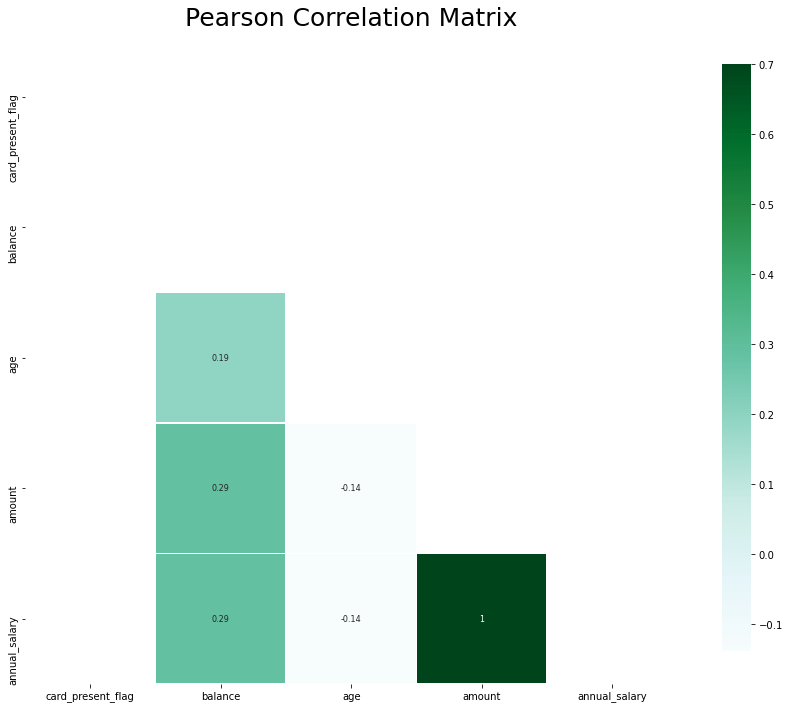

In [353]:
features = ['card_present_flag', 'balance', 'age', 'amount', 'annual_salary','gender','movement']

mask = np.zeros_like(df[features].corr(), dtype = np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(df[features].corr(),linewidths = 0.25,vmax = 0.7,square = True,cmap = "BuGn", 
            linecolor = 'w',annot = True,annot_kws = {"size":8},mask = mask,cbar_kws = {"shrink": 0.9})

# As we clearly calculate amount by salary they must be linerly dependent on each other so if we take amount the prediction would be good 
# Lets take amount one time and ignore it in other and see the model training and results

# Simple regression with amount 

In [453]:
X = df.iloc[:, [1,2,3,4,6]].values
y = df.iloc[:, 7].values



from sklearn.preprocessing import LabelEncoder
Labelx=LabelEncoder()
X[:,1]=Labelx.fit_transform(X[:,1])
X[:,4]=Labelx.fit_transform(X[:,4])
print(X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4 , random_state = 0)

[[8342.11 1 23 3903.95 0]
 [2040.58 0 23 1626.48 0]
 [3158.51 1 22 983.36 0]
 ...
 [11381.44 1 69 1043.12 0]
 [11454.52 0 20 1395.49 0]
 [19893.45 1 19 2639.76 0]]


In [454]:
from sklearn.linear_model import LinearRegression
rg=LinearRegression()
rg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

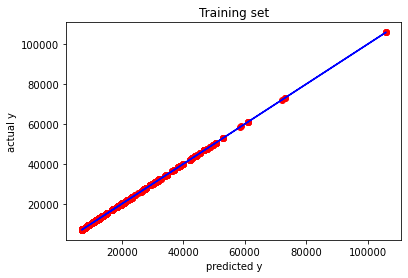

0.9999999995621669

In [455]:
#predicting
y_pred = rg.predict(X_train)
plt.scatter(y_train,y_pred,color='red')
plt.plot(y_train,y_pred,color='blue')
plt.title('Training set')
plt.xlabel('predicted y')
plt.ylabel('actual y')
plt.show()
rg.score(X_test,y_test)

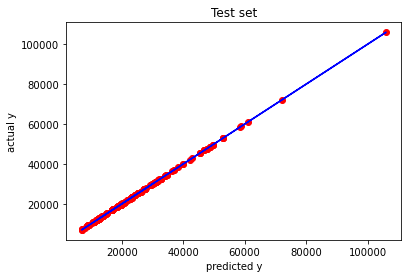

In [456]:
#predicting
y_pred = rg.predict(X_test)
plt.scatter(y_test,y_pred,color='red')
plt.plot(y_test,y_pred,color='blue')
plt.title('Test set')
plt.xlabel('predicted y')
plt.ylabel('actual y')
plt.show()


# Error check

In [460]:
def NRMSE(actual,predicted):
    X=actual
    Y=predicted
    sum=0
    c=0
    for i in range(0,len(X)):
        sum = sum + (X[i]-Y[i])**2
    sum=sum/len(X)
    sum=sum/(max(X)-min(X))
    return(math.sqrt(sum)) 

In [461]:
NRMSE(y_test,y_pred)

0.0009008404582048161

In [462]:
rg.score(X_test,y_test)

0.9999999995621669

In [463]:
from sklearn.tree import DecisionTreeRegressor as DTS
rg=DTS(random_state=0)
rg.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

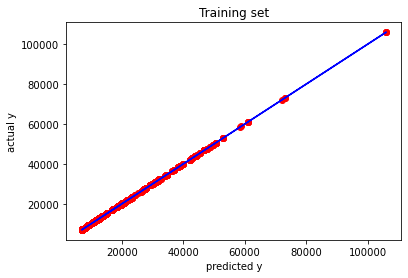

In [464]:
#predicting
y_pred = rg.predict(X_train)
plt.scatter(y_train,y_pred,color='red')
plt.plot(y_train,y_pred,color='blue')
plt.title('Training set')
plt.xlabel('predicted y')
plt.ylabel('actual y')
plt.show()

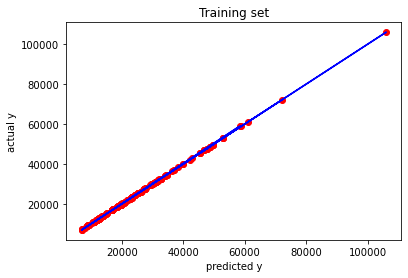

In [465]:
#predicting
y_pred = rg.predict(X_test)
plt.scatter(y_test,y_pred,color='red')
plt.plot(y_test,y_pred,color='blue')
plt.title('Training set')
plt.xlabel('predicted y')
plt.ylabel('actual y')
plt.show()

In [466]:
print(NRMSE(y_test,y_pred))
rg.score(X_test,y_test)

0.1271516780498635


0.9999912771804852

# Without taking amount as dependent variable

In [467]:
X = df.iloc[:, [1,2,3,6]].values
y = df.iloc[:, 7].values



from sklearn.preprocessing import LabelEncoder
Labelx=LabelEncoder()
X[:,1]=Labelx.fit_transform(X[:,1])
X[:,3]=Labelx.fit_transform(X[:,3])
print(X)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3 , random_state = 0)

[[8342.11 1 23 0]
 [2040.58 0 23 0]
 [3158.51 1 22 0]
 ...
 [11381.44 1 69 0]
 [11454.52 0 20 0]
 [19893.45 1 19 0]]


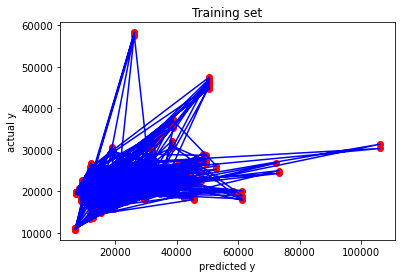

0.10713733988153118

In [468]:
from sklearn.linear_model import LinearRegression
rg=LinearRegression()
rg.fit(X_train,y_train)
#predicting
y_pred = rg.predict(X_train)
plt.scatter(y_train,y_pred,color='red')
plt.plot(y_train,y_pred,color='blue')
plt.title('Training set')
plt.xlabel('predicted y')
plt.ylabel('actual y')
plt.show()
rg.score(X_test,y_test)

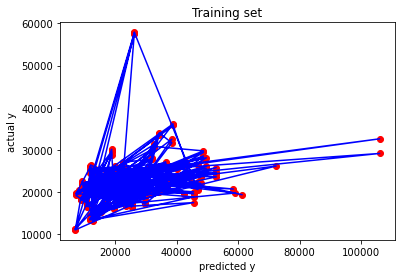

In [469]:
#predicting
y_pred = rg.predict(X_test)
plt.scatter(y_test,y_pred,color='red')
plt.plot(y_test,y_pred,color='blue')
plt.title('Training set')
plt.xlabel('predicted y')
plt.ylabel('actual y')
plt.show()

In [470]:
print(NRMSE(y_test,y_pred))
print(rg.score(X_test,y_test))

42.042784894568115
0.10713733988153118


# Decision Tree

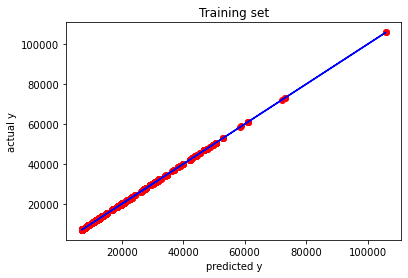

0.16668798878975155

In [471]:
from sklearn.tree import DecisionTreeRegressor as DTS
rg=DTS(random_state=0)
rg.fit(X_train,y_train)
rg.fit(X_train,y_train)
#predicting
y_pred = rg.predict(X_train)
plt.scatter(y_train,y_pred,color='red')
plt.plot(y_train,y_pred,color='blue')
plt.title('Training set')
plt.xlabel('predicted y')
plt.ylabel('actual y')
plt.show()
rg.score(X_test,y_test)

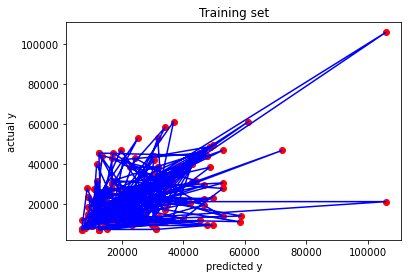

In [472]:
#predicting
y_pred = rg.predict(X_test)
plt.scatter(y_test,y_pred,color='red')
plt.plot(y_test,y_pred,color='blue')
plt.title('Training set')
plt.xlabel('predicted y')
plt.ylabel('actual y')
plt.show()

In [473]:
print(NRMSE(y_test,y_pred))
print(rg.score(X_test,y_test))

40.61654390289165
0.16668798878975155


# Clearly NRMSE for Decision tree is very less as compare to Simple regressor 